# Udacity Data Analysis Project:
##     Wrangle and Analyze Data
By: Lionel Courteau


## Table of Contents
- [Introduction](#intro)
- [Data Sources](#sources)
- [Part I - Data Gathering](#gathering)
- [Part II - Data Assessment](#assess)
- [Part III - Data Cleaning](#cleaning)
- [Part IV - Data Analysis](#analysis)
- [Summary and Conclusion](#Summary/Conclusion)

<a id='intro'></a>
### Introduction
> For this project I am going to gather and analyze data from the Twitter account ["WeRateDogs"](https://twitter.com/dog_rates?lang=de). For that, data is gathered via manual/programmatical download, and over an API. Afterwards I am going to assess the gathered data, define any issues that are found and clean these issues to get a nice and cleaned master dataframe.

<a id='sources'></a>
### Data Sources

>**Source 1:** WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)</li>
><ul>   
>    <li><b>Source:</b> <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv">Udacity</a></li>
>    <li><b>Version:</b> Latest (Download 12-13-2020)</li>
>    <li><b>Method of gathering:</b> Manual download</li>
></ul>

>**Source 2:** Tweet image predictions (image_predictions.tsv)</li>\n
><ul>   
>    <li><b>Source:</b> <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv">Udacity</a></li>
>    <li><b>Version:</b> Latest (Download 12-13-2020)</li>
>    <li><b>Method of gathering:</b> Programmatical download via Requests</li>
></ul>

>**Source 3:** Additional Twitter data (tweet_json.txt)
><ul>   
>    <li><b>Source:</b> <a href = "https://twitter.com/dog_rates">WeRateDogs™</a></li>"
>    <li><b>Version</b>: Latest (Gathered 12-14-2020)</li>
>    <li><b>Method of gathering:</b> API via Tweepy</li>
></ul>

##### Need to import the essential libraries to download, read and process the data

In [1]:
import requests #for downloading data
import numpy as np #for array functions
import pandas as pd #for data handling
import tweepy #for twitter api access
import json #for handling json data
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #data visualization
import re #for text processing
import glob

<a id='gathering'></a>
### Part I - Data Gathering
<br>

#### Step 1: Gather data from WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)
> This step was relatively easy. All that I had to do was manually download the `.csv` file from Udacity. Then load it directly into a dataframe with *pandas*.

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None



#### Step 2: Gather data from Tweet image predictions file (image_predictions.tsv)¶
> Here things get a little more difficult. This file requires the use of the `requests` library. Once the request to pull the file dinishes, I need to write a method to return images. Afterwards, I simply use a modified `read_csv` function to load the data into a dataframe.

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# get a response
response = requests.get(url)

#write a "return to an image" method
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [4]:
# store data from "image_predictions.tsv" into a dataframe
df_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Step 3: Getting Additional Twitter data (tweet_json.txt)
>To gather the data from the Twitter API, I created a Twitter developer account with the intent to gather the data via `tweepy`. However due to some beginners issues I had to manually download the file called "tweet_json.txt".
<br>

>To show that I tried the original method, I left the code for accessing the Twitter API down below.

In [5]:
consumer_key = '2kIOA6mWr0deDmcDBfvVhgC4r'
consumer_secret = 'C8xzSl8BW6PDRkvLV0Az5ZCx5pBF8OVpOgIkQdZRW7xso7j4sN'
access_token = '1338962792003510272-Mpn3Nc1a2ggF2KOhl1s57s1p6HCtEo'
access_secret = 'ho0a65BDoh7jCGU7ASxSS538lVYxROOrKQoPybHkJhjZB'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
picked_atr = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        picked_atr.append({'tweet_id': json_data['id'],
                          'favorites': json_data['favorite_count'],
                          'retweets': json_data['retweet_count'],
                          'timestamp': json_data['created_at']})

df_tweet_picked_atr = pd.DataFrame(picked_atr, columns=['tweet_id','favorites',
                                                    'retweets','timestamp'])


In [7]:
df_tweet_picked_atr.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017


<a id='assess'></a>
### Part II - Data Assessment

>Now that we have gathered our data, we are going to look for issues with the quality or tidiness of the data and its dimensions.

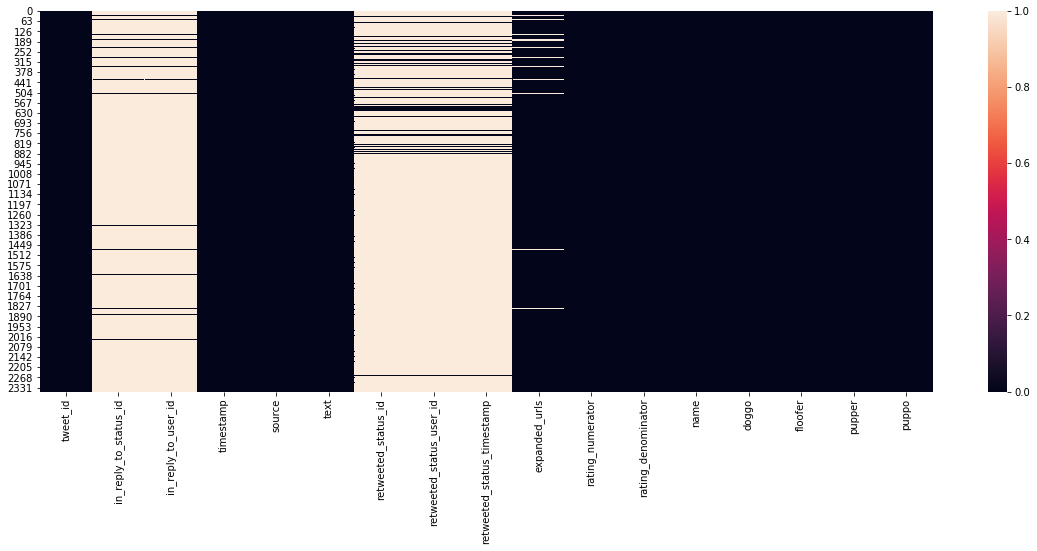

In [8]:
figure, axis = plt.subplots(figsize = (20,7))
axis = sns.heatmap(df_twitter.isnull(), vmin=0, vmax = 1)

As shown above, we have a lot of missing data. Mostly in the *reply* and *retweet* columns. Since we only want original posts with images, we're gonna have to drop them later - the missing data in the *expanded_urls* column will also disappear with the cleaning operation.

In [9]:
df_twitter.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1096,736365877722001409,NaN,NaN,2016-05-28 01:18:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's extremely impatient. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736365877...,11,10,Rory,None,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
826,769335591808995329,NaN,NaN,2016-08-27 00:47:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ever seen a dog pet another dog...,7.069045e+17,4.196984e+09,2016-03-07 18:09:06 +0000,"https://vine.co/v/iXQAm5Lrgrh,https://vine.co/...",13,10,None,None,None,None,None
1667,682662431982772225,NaN,NaN,2015-12-31 20:39:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Joey and Izzy. Joey only has one ear that...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682662431...,11,10,Joey,None,None,None,None
1557,688804835492233216,NaN,NaN,2016-01-17 19:27:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you stumble but recover quickly cause you...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688804835...,12,10,None,None,None,None,None
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to DayZ. She is definitely stuck on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044...,11,10,DayZ,None,None,None,None
409,823333489516937216,8.233264e+17,1.582854e+09,2017-01-23 00:56:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@HistoryInPics 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
207,852553447878664193,NaN,NaN,2017-04-13 16:05:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jarod. He likes having his belly brush...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,None,None,None,None
2150,669683899023405056,NaN,NaN,2015-11-26 01:07:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kloey. Her mother was a unicorn. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669683899...,10,10,Kloey,None,None,None,None
1637,684195085588783105,NaN,NaN,2016-01-05 02:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684195085...,9,10,Tino,None,None,None,None


During visual assessment we can observe that:

- not all tweets could be classified as either doggo, floofer, pupper or puppo and all columns contain "None"
- the source contains unnecessary HTML code
- there is the name "None" in the `name` column

In [10]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Also the following datatypes are incorrect:

- `tweet_id` values should be str objects
- `timestamp` values should be datetime objects

Now let's see how many wrong names we can find.

In [11]:
df_twitter.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Buddy          7
Toby           7
Bailey         7
Daisy          7
Jack           6
Milo           6
Oscar          6
Scout          6
Stanley        6
Bella          6
Rusty          6
Leo            6
Dave           6
Jax            6
Koda           6
Oakley         5
            ... 
Blakely        1
Sully          1
Grizzwald      1
Daniel         1
Trevith        1
Keet           1
Pippin         1
Chase          1
light          1
Livvie         1
Lucky          1
Brudge         1
Akumi          1
Simba          1
Grizz          1
Sid            1
Bradlay        1
BeBe           1
Remus          1
Stu            1
Doobert        1
Barney         1
Roscoe         1
Clarkus        1
Lolo           1
Jett           1
Pip            1
Tobi          

After counting all the values, we can see that the `name` column contains wrong names like "None", "a", "the", "an".

In [12]:
df_twitter[df_twitter.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


There appear to be no duplicated values. So there is a high probability that all the entries have unique values.

In [13]:
df_twitter.tweet_id.nunique()

2356

As proven above, the number of unique values for `tweet_id` is equal to the length of the data frame.

Now we need check how many dog classifications there are. But first let's create a copy of the twitter dataframe for further assessing.

In [14]:
df_twitter_assess = df_twitter.copy()

In [15]:
#returns true if there is no dog classification in any of the columns
df_twitter_assess[["doggo","floofer","pupper","puppo"]].apply(lambda x: True if
    (x[0] == "None" and x[1] == "None" and x[2] == "None" and x[3] =="None") 
    else False, axis = 1).value_counts()

True     1976
False     380
dtype: int64

In [16]:
df_twitter_assess["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
df_twitter_assess["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
df_twitter_assess["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
df_twitter_assess["puppo"].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

From these tests, we can see that we need to refill a lot of cells.(Only 16% of the rows don't have missing data)

Now let's have a look at the ratings. By what we have seen so far, it looks like the ratings have a format of 13/10 or 12/10 and so on. So we should expect a numerator of `> 10` and a denominator of `10`.

In [20]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

From the observations above, there is a wide range of numbers for `ating_numerator` with a smaller range for `rating_denominator`
- `rating_numerator` maximum = 1776
- `rating_denominator` maximum = 170

In [22]:
print(df_twitter.query("rating_numerator == '1776'").text)

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object


This rating should be correct - so a lot higher values as 12 or 13 would be valid to this rating system. 

Now for the small ones.

In [23]:
print(df_twitter.query("rating_numerator == '1'").text)

605     RT @dog_rates: Not familiar with this breed. N...
1446    After reading the comments I may have overesti...
1869    What kind of person sends in a picture without...
1940    The millennials have spoken and we've decided ...
2038    After 22 minutes of careful deliberation this ...
2091    Flamboyant pup here. Probably poisonous. Won't...
2261    Never seen dog like this. Breathes heavy. Tilt...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2338    Not familiar with this breed. No tail (weird)....
Name: text, dtype: object


These tweets don't appear to contain pictures that show any dogs. Also in entry *2335* the rating got extracted wrongly (misinterpreted as 1/2 instead of 3 1/2).

In [24]:
print(df_twitter.query("rating_numerator == '0'").text)

315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object


No clear dog photos again. 

Now let's do the same check for the denominator.

In [25]:
print(df_twitter.query("rating_denominator == '170'").text)

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [26]:
print(df_twitter.query("rating_denominator == '7'").text)

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [27]:
print(df_twitter.query("rating_denominator == '0'").text)

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


The same problems as with the numerator. 

There also seems to be multiple occurences of the pattern `\d+\/\d+`. We will need to extract this by ourselves and see what we get.

In [28]:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" #we may expect an integer rating on what we saw, but maybe some floats are the case

#https://stackoverflow.com/questions/36028932/how-to-extract-specific-content-in-a-pandas-dataframe-with-a-regex
df_twitter_assess["rating"] = df_twitter_assess.text.str.extract(pattern, expand = True)[0]

#https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns
df_twitter_assess[['num', 'denom']] = df_twitter_assess['rating'].str.split('/', n=1, expand=True)

In [29]:
df_twitter_assess.rating_numerator = df_twitter_assess.rating_numerator.astype("str")
df_twitter_assess.rating_denominator = df_twitter_assess.rating_denominator.astype("str")

In [30]:
#look for differences in the original numerator and the new extract
df_twitter_assess["check_num"] = df_twitter_assess[["rating_numerator",
                                                    "num"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [31]:
df_twitter_assess.check_num.value_counts()

True     2349
False       7
Name: check_num, dtype: int64

In [32]:
df_twitter_assess.query("check_num == False")[["rating_numerator", "num","check_num"]]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


Here we have the differences found by extracting the first occurrence of the pattern. These ratings got transformed to integers and as a result are wrong.

In [33]:
df_twitter_assess[["rating_numerator", "num", "check_num"]].sample(15)

,rating_numerator,num,check_num
2174,8,8,True
894,12,12,True
123,14,14,True
561,12,12,True
507,12,12,True
1449,10,10,True
1837,9,9,True
1927,10,10,True
1600,11,11,True
1629,4,4,True


Now for denominators

In [34]:
df_twitter_assess["check_denom"] = df_twitter_assess[["rating_denominator", 
                                                      "denom"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [35]:
df_twitter_assess.check_denom.value_counts()

True     2355
False       1
Name: check_denom, dtype: int64

In [36]:
df_twitter_assess.query("check_denom == False")[["rating_denominator", "denom","check_denom"]] 
#problem with integer (does it include floats?)

,rating_denominator,denom,check_denom
313,0,00,False


There appears to be no problem to worry about.

In [37]:
df_twitter_assess[["rating_denominator", "denom", "check_denom"]].sample(5)

,rating_denominator,denom,check_denom
937,10,10,True
1452,10,10,True
190,10,10,True
458,10,10,True
1928,10,10,True


Now we should assess how often there are multiple occurences of the "rating pattern" in one tweet.

In [38]:
df_twitter_assess["count"] = df_twitter_assess.text.str.count(pattern)

In [39]:
df_twitter_assess["count"].value_counts()

1    2323
2      32
3       1
Name: count, dtype: int64

In [40]:
#show full text
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 4000)

df_twitter_assess[["text", "count"]].query("count != 1")

,text,count
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,2
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",2
561,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",2
860,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,2
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2



Here we can see that:

- this data contains retweets (as mentioned before)
- sometimes there are multiple dogs/cats or others in one picture
- some of these ratings are unclear

**df_prediction**
<br>
Let's also begin with the missing data first.

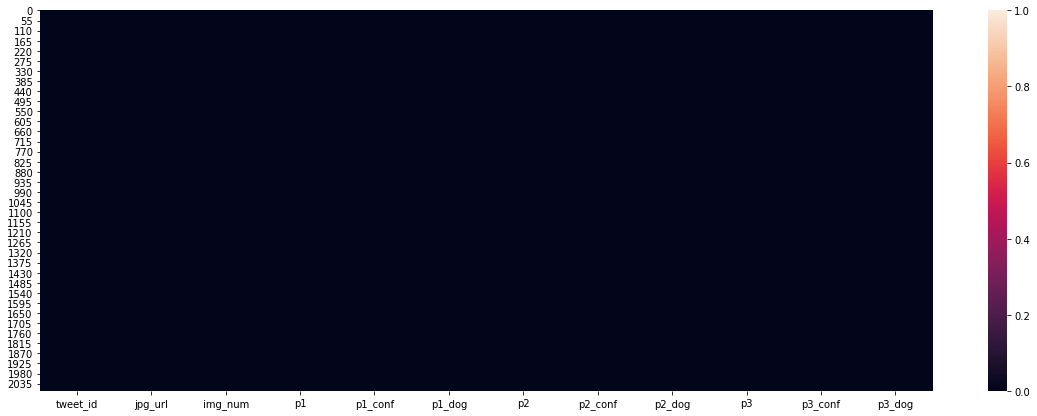

In [41]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_predictions.isnull(), vmin = 0, vmax = 1)

Looks solid. Now the visual assessment:

In [42]:
df_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
219,670079681849372674,https://pbs.twimg.com/media/CUyZ6mVW4AI8YWZ.jpg,1,mud_turtle,0.157477,False,terrapin,0.131846,False,box_turtle,0.060678,False
285,671147085991960577,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,piggy_bank,0.176320,False,hair_spray,0.097487,False,toy_poodle,0.086502,True
1989,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
1261,748932637671223296,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,1,borzoi,0.742912,True,wire-haired_fox_terrier,0.204082,True,English_setter,0.021032,True
1144,730211855403241472,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True
234,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,Chihuahua,0.275793,True,corn,0.073596,False,bolete,0.054905,False
1112,724049859469295616,https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg,1,Border_collie,0.581835,True,collie,0.344588,True,Shetland_sheepdog,0.043584,True
916,701545186879471618,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,Border_collie,0.280893,True,Cardigan,0.112550,True,toy_terrier,0.053317,True
419,674038233588723717,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,1,Eskimo_dog,0.358459,True,Norwegian_elkhound,0.206963,True,malamute,0.148236,True


Observations:

- the predicitions are either lowercase or uppercase
- there is an underscore instead of a whitespace between words
- there are rows with no prediciton of a dog (neither in 1, 2 nor 3)

In [43]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- the `tweet_id` column should again be str

The best way to find duplicates is to look at the jpg - url. If there are value counts `> 1`, then this data contains duplicates/retweets.

In [44]:
df_predictions.jpg_url.value_counts().head(12)

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg    2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg    2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg    2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg    2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg    2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg    2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg    2
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg    2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg    2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg    2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg    2
Name: jpg_url, dtype: int64

As predicted - this data contains retweets.

In [45]:
df_predictions[df_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [46]:
df_predictions[df_predictions.jpg_url == "https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.00785,False
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.00785,False


In [47]:

df_twitter[df_twitter.tweet_id == 819015331746349057]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
447,819015331746349057,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,8.190064e+17,4.196984e+09,2017-01-11 02:21:57 +0000,"https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1",14,10,Sunny,doggo,None,None,None


We only want Tweets with pictures containing dogs. Let's check and see if there are pictures, for which the ML - Algorithm didn't predict any dogs.

In [48]:

df_predictions.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [49]:

df_predictions.query("p1_dog == True and p2_dog == True and p3_dog == True")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True


In [50]:
df_predictions.query("p1_dog == False and p2_dog == True and p3_dog == True")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk_terrier,0.003913,True
171,668994913074286592,https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg,1,hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True
183,669353438988365824,https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg,1,teddy,0.379656,False,Pembroke,0.212343,True,chow,0.096995,True
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,Labrador_retriever,0.026854,True


In [51]:
df_predictions.query("p1_dog == False and (p2_dog == True or p3_dog == True)")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False


After checking some of these pictures it starts to become clear. That sometimes the dogs are in the background or the pictures doesn't contain any dogs at all.

**df_tweet_picked_atr**
<br>
Lets repeat the same pattern for this dataset: missing data → visual assessment.

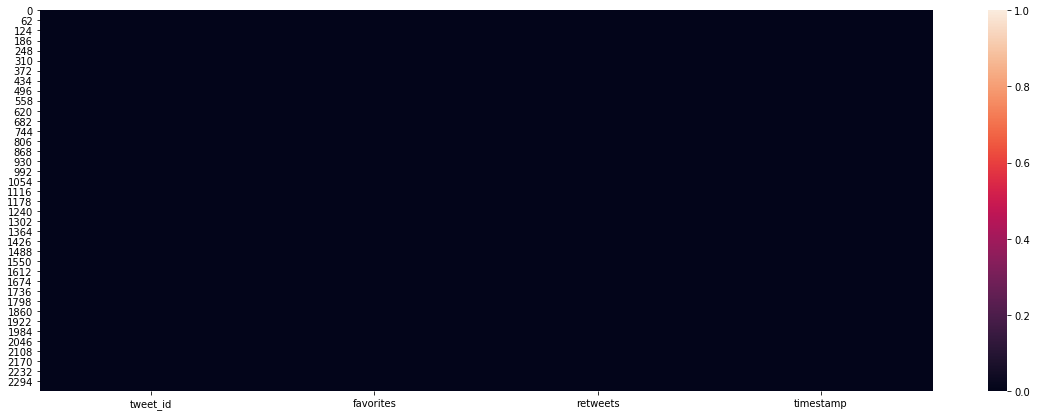

In [52]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_tweet_picked_atr.isnull(), vmin = 0, vmax = 1)

In [53]:
df_tweet_picked_atr.sample(12)

,tweet_id,favorites,retweets,timestamp
834,767884188863397888,5309,1634,Tue Aug 23 00:40:31 +0000 2016
709,784826020293709826,11310,3712,Sat Oct 08 18:41:19 +0000 2016
82,876537666061221889,23869,4800,Sun Jun 18 20:30:39 +0000 2017
1270,709225125749587968,2615,647,Mon Mar 14 03:50:21 +0000 2016
451,818614493328580609,10971,2982,Tue Jan 10 00:24:38 +0000 2017
20,887705289381826560,30779,5609,Wed Jul 19 16:06:48 +0000 2017
2330,666345417576210432,307,146,Mon Nov 16 20:01:42 +0000 2015
946,752334515931054080,4238,1263,Mon Jul 11 02:51:40 +0000 2016
1612,685307451701334016,2262,496,Fri Jan 08 03:50:03 +0000 2016
519,810254108431155201,16380,3901,Sat Dec 17 22:43:27 +0000 2016


In [54]:
df_tweet_picked_atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
timestamp    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


#### Assessment Summary


##### Quality

***df_twitter table***

- the *id* columns datatype is **int** when it should be **str**
- the *timestamp* column datatype is **object** when it should be **datetime**
- some of the dogs are not classified as either "doggo", "floofer", "pupper" or "puppo" and are instead labeled "None"
- some of the dog names are incorrect (None, an, by, a, ...)
- contains retweets
- some of the ratings are not correctly extracted (mostly if there are `>1` entries with the pattern "(\d+(.\d+)?\/\d+(.\d+)?)"
- also transforming the ratings to **int** created some mistakes (there are also floats)
- the source column contains **html** code

***df_predictions table***

- the *id* columns datatype is **int** and should be **str**
- contains retweets (duplicated rows in column `jpg_url`)
- there are pictures in this table that do not have dogs
- the predictions are sometimes uppercase, sometimes lowercase
- also there is a `_` instead of a whitespace in the predictions

***df_tweet_picked_atr table***

- the *id* columns datatype is **int** and should be **str**

##### Tidiness

***df_twitter table***

- columns `doggo`, `floofer`, `pupper` and `puppo` are not easy to analyze and should be allocated to one column

***df_predictions table***

- the *prediction* and *confidence* columns should be reduced to two columns - one for the prediction with the highest confidence (dog)

***all tables***

- All three tables share the column tweet_id and should be merged together.

<a id='cleaning'></a>
### Part III - Data Cleaning


Cleaning steps:

1) Merge tables together
<br>
2) Drop replies, retweets and the corresponding columns and also drop the tweets without an image or with images which don't display doggos
<br>
3) Clean the column datatypes
<br>
4) Clean the wrong numerators - replace the floats, and drop the ones with multiple pattern occurence
<br>
5) Extract the source from html code
<br>
6) Remove "None" value from the *doggo*, *floofer*, *pupper* and *puppo* column and merge them into one column
<br>
7) Remove wrong names from *name* column
<br>
8) Reduce the *prediction* columns into two - *breed* and *conf*
<br>
9) Clean the new breed column by replacing the `_` with a whitespace and make them all lowercase
<br>
10) Drop `timestamp_y` and rename `timestamp_x`

#### 1) Merge tables together

I could clean all the tables one by one, but all of them share cleaning needs and/or are dependent on each other. By merging them all together as a singular table, I can save some coding time and avoid repetition.

In [55]:
# use outer join so not to lose rows
df_master_archive = pd.merge(df_twitter, df_tweet_picked_atr, on = "tweet_id", how = "outer")

In [56]:
df_master_archive = pd.merge(df_master_archive, df_predictions, on = "tweet_id", how = "outer")

In [57]:
df_master_archive_clean = df_master_archive.copy()

In [58]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp_x                   2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites                     23

#### 2) Drop replies, retweets and the corresponding columns and also drop the tweets without an image or with images which don't display doggos

Now we have to remove the replies, retweets and the tweets without an image displaying a dog, because we only want original tweets with images. Let's visualize our missing data first.

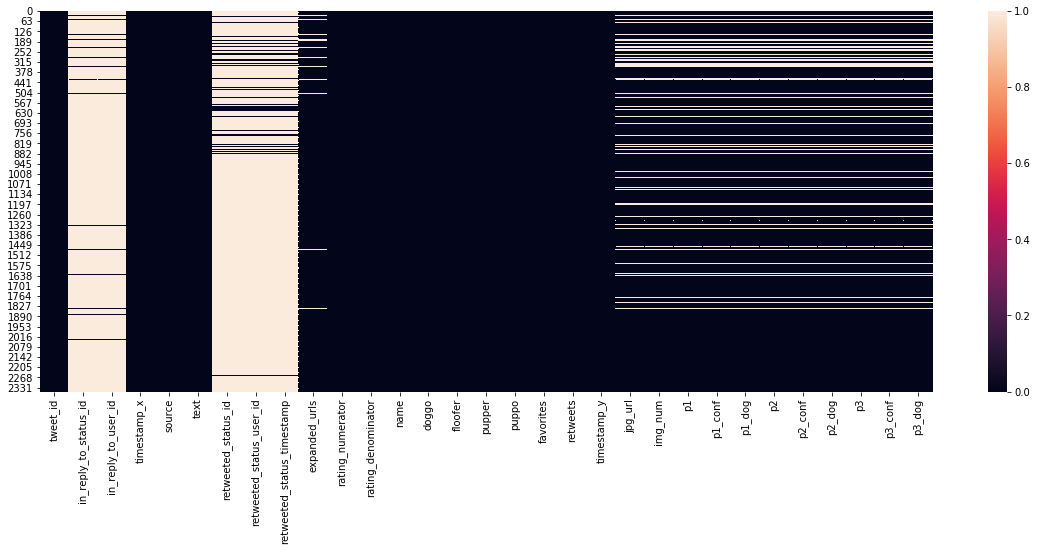

In [59]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_archive_clean.isnull(), vmin = 0, vmax = 1)

In [60]:
pd.set_option('display.max_colwidth', 50)
df_master_archive_clean[df_master_archive_clean["retweeted_status_id"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,timestamp_y,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467.0,8853.0,Tue Aug 01 16:23:56 +0000 2017,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819.0,6514.0,Tue Aug 01 00:17:27 +0000 2017,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461.0,4328.0,Mon Jul 31 00:18:03 +0000 2017,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42908.0,8964.0,Sun Jul 30 15:58:51 +0000 2017,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,41048.0,9774.0,Sat Jul 29 16:00:24 +0000 2017,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,20562.0,3261.0,Sat Jul 29 00:08:17 +0000 2017,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,12041.0,2158.0,Fri Jul 28 16:27:12 +0000 2017,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,56848.0,16716.0,Fri Jul 28 00:22:40 +0000 2017,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10

In [61]:
#we only want the rows without an entry in "retweeted_status_id" in our master dataframe
df_master_archive_clean = df_master_archive_clean[df_master_archive_clean["retweeted_status_id"].isnull()]

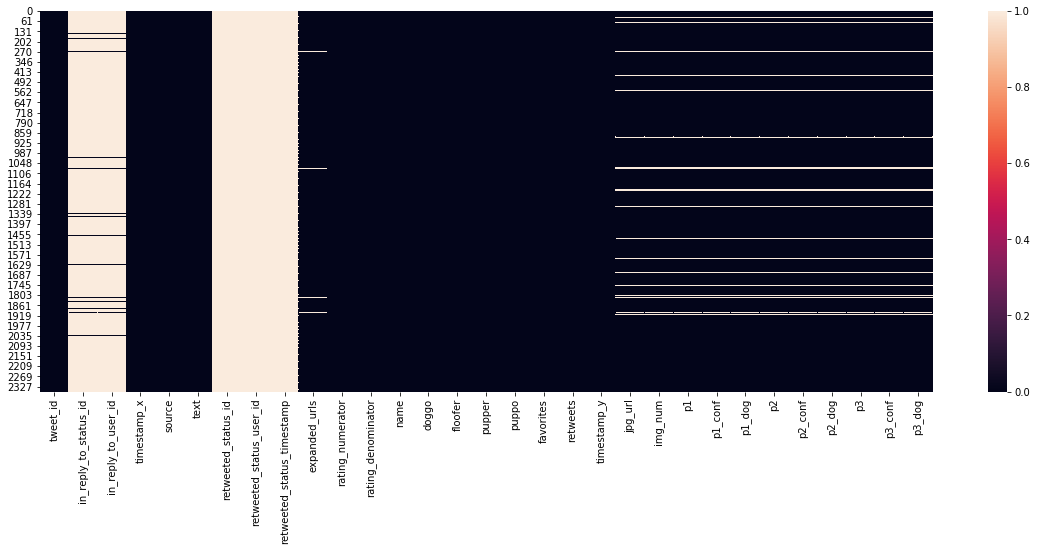

In [62]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_archive_clean.isnull(), vmin = 0, vmax = 1)

In [63]:
df_master_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp_x', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'favorites', 'retweets',
       'timestamp_y', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [64]:
#check with the column from the picked_atr table, no retweet_status_id
df_master_archive_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [65]:
#same as for the retweet_status_id, we only want the rows without an entry in "in_reply_to_status_id"
df_master_archive_clean = df_master_archive_clean[df_master_archive_clean.in_reply_to_status_id.isnull()]

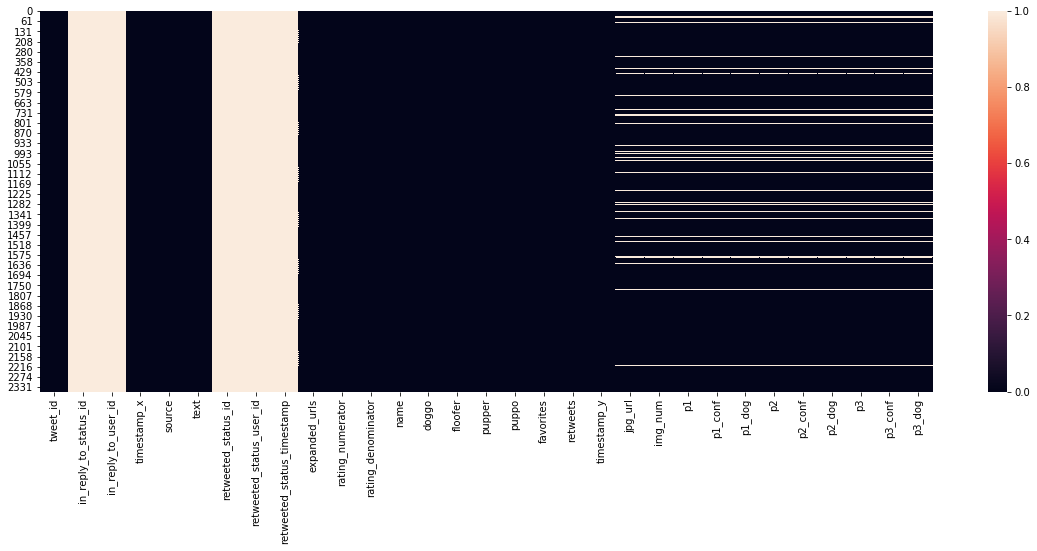

In [66]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_archive_clean.isnull(), vmin = 0, vmax = 1)

During the gathering process there were some tweets which had gotten deleted by the account. We will also drop them out of our master dataframe.

In [67]:
#drop the unneeded columns
df_master_archive_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp"], inplace=True, axis = 1)

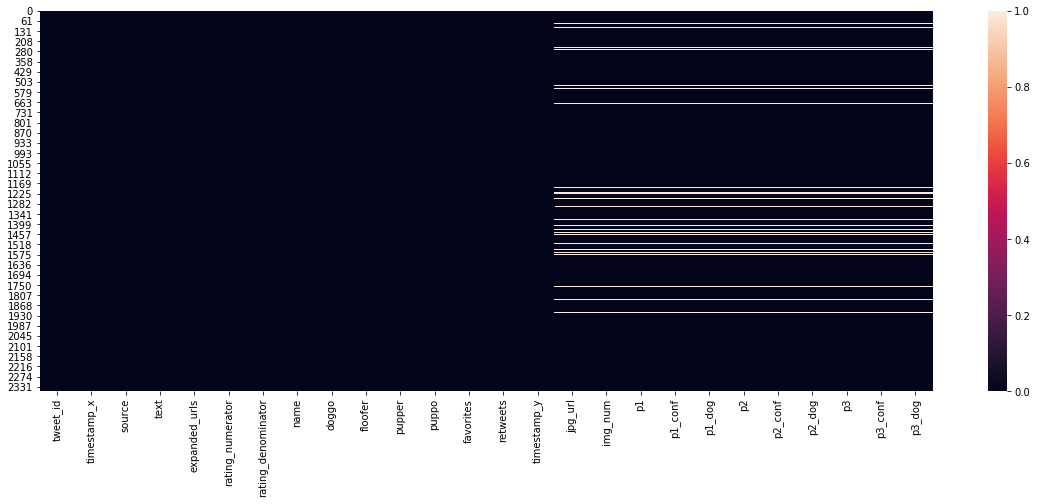

In [68]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_archive_clean.isnull(), vmin = 0, vmax = 1)

Now we want to take a look on the "jpg_url" column, and drop all the rows which are NAN - because these are the ones without images. To check that, we could read in the image data from the gathered data - but this for another time.

In [69]:
df_master_archive_clean.dropna(subset = ["jpg_url"], inplace = True)

In [70]:
#check if there are still duplicated images after dropping the replies and the retweets
sum(df_master_archive_clean.jpg_url.duplicated())

0

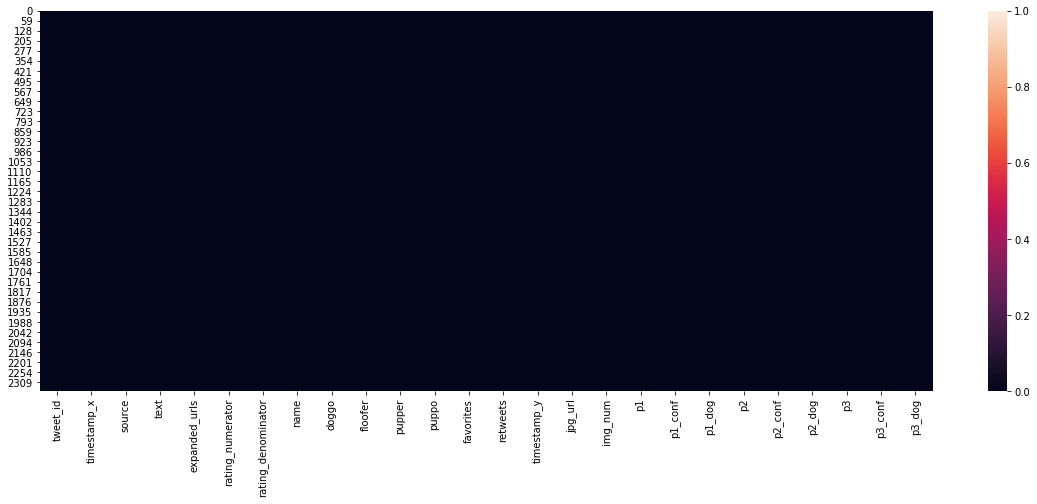

In [71]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_archive_clean.isnull(), vmin = 0, vmax = 1)

The last step here is to drop the rows which contain images, that are not displaying any dogs (relying on the top three predictions of the ML algorithm).

In [72]:
df_master_archive_clean.drop(df_master_archive_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

In [73]:
df_master_archive_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,timestamp_y,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [74]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1666 non-null int64
timestamp_x           1666 non-null object
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
favorites             1666 non-null float64
retweets              1666 non-null float64
timestamp_y           1666 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-n

#### 3) Clean the column datatypes

In [75]:
df_master_archive_clean["tweet_id"] = df_master_archive_clean["tweet_id"].astype("str")

In [76]:
#transform the timestamp to datetime
df_master_archive_clean["timestamp_x"] = pd.to_datetime(df_master_archive_clean.timestamp_x)

In [77]:
df_master_archive_clean["timestamp_y"] = pd.to_datetime(df_master_archive_clean.timestamp_y)

In [78]:
for x in ["retweets", "favorites", "img_num"]:
    df_master_archive_clean[x] = df_master_archive_clean[x].astype("int64")

In [79]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1666 non-null object
timestamp_x           1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
favorites             1666 non-null int64
retweets              1666 non-null int64
timestamp_y           1666 non-null datetime64[ns]
jpg_url               1666 non-null object
img_num               1666 non-null int64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                   

#### 4) Clean the wrong numerators - replace the floats, and drop the ones with multiple pattern occurence

While assessing the dataset, we found out, that floating numbers got transformed into integers, which lead to loss of information.

In [80]:
df_twitter_assess.query("check_num == False")[["rating_numerator", "num","check_num"]]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


We dropped a lot of rows, so we cannot be sure that all of these problems are still in this dataset, so we will extract it again.

In [81]:
pattern = "(\d+\.\d+\/\d+)"

df_master_archive_clean.text.str.extract(pattern, expand = True)[0].dropna()

45       13.5/10
695      9.75/10
763     11.27/10
1712    11.26/10
Name: 0, dtype: object

In [82]:
#get the right numerator out of the string
df_num_clean = df_master_archive_clean.text.str.extract(pattern, expand = True)[0].dropna().str.split('/', n=1, expand=True)[0]

In [83]:
df_num_clean

45       13.5
695      9.75
763     11.27
1712    11.26
Name: 0, dtype: object

In [84]:
#get the index of the wrong data
df_num_clean_index = df_num_clean.index
df_num_clean_values = df_num_clean.values.astype("float64")

Now that we have our data together, we can impute these values and clean this data.

In [85]:
#transform the datatypes to float
df_master_archive_clean.rating_numerator = df_master_archive_clean.rating_numerator.astype("float64")
df_master_archive_clean.rating_denominator = df_master_archive_clean.rating_denominator.astype("float64")
#impute the data
df_master_archive_clean.loc[df_num_clean_index, "rating_numerator"] = df_num_clean_values
df_master_archive_clean.loc[df_num_clean_index].rating_numerator

45      13.50
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

We also have the problem; there can be multiple occurrences of the pattern. The reason for this is - most of the time - the display of two or more dogs in an image. For these cases we could raise the ratings, because the author of the Twitter account did this in one case that we found. Or we could build the average rating per picture. For now, we are going to drop them out of the dataframe.

In [86]:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

print(df_master_archive_clean.text.str.count(pattern)[df_master_archive_clean.text.str.count(pattern) != 1])

#get the index of rows that contain the pattern more than once
pattern_clean_index = df_master_archive_clean.text.str.count(pattern)[df_master_archive_clean.text.str.count(pattern) != 1].index

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


In [87]:
df_master_archive_clean.drop(pattern_clean_index, inplace = True)

In [88]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1640 non-null object
timestamp_x           1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1640 non-null object
doggo                 1640 non-null object
floofer               1640 non-null object
pupper                1640 non-null object
puppo                 1640 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
timestamp_y           1640 non-null datetime64[ns]
jpg_url               1640 non-null object
img_num               1640 non-null int64
p1                    1640 non-null object
p1_conf               1640 non-null float64
p1_dog                1640 non-null object
p2               

In [89]:
#no more occurrences of the mentioned problem are left
print(df_master_archive_clean.text.str.count(pattern)[df_master_archive_clean.text.str.count(pattern) != 1])

Series([], Name: text, dtype: int64)


#### 5) Extract the source from html code


Right now the source column is not giving us any useful information. Because the relevant information is always between two "> <", the information will be easy to extract.

In [90]:
df_master_archive_clean.head(5)

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,timestamp_y,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,33819,6514,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,25461,4328,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,42908,8964,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,41048,9774,2017-07-29 16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,20562,3261,2017-07-29 00:08:17,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [91]:
#https://stackoverflow.com/questions/3075130/what-is-the-difference-between-and-regular-expressions
df_master_archive_clean.source = df_master_archive_clean.source.str.extract("\>(.*?)\<", expand = True)

In [92]:
df_master_archive_clean.iloc[:,:3].head(5)

,tweet_id,timestamp_x,source
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone


In [93]:
df_master_archive_clean.source.value_counts()

Twitter for iPhone    1611
Twitter Web Client      20
TweetDeck                9
Name: source, dtype: int64

#### 6) Remove "None" value from the *doggo*, *floofer*, *pupper* and *puppo* column and merge them into one column

We want to reduce the columns into one for an easier analysis. For that to happen, we have to remove the "None" with "" at first to concat the columns together and afterswards add *np.nan*, so we could easily exclude these rows from a specific analysis.

In [94]:
#replace "None" with "" in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    df_master_archive_clean[x].replace("None", "", inplace = True)

#https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python
#concat the columns together
df_master_archive_clean['dog_class'] = df_master_archive_clean['doggo'].map(str) + df_master_archive_clean[
    'floofer'].map(str) + df_master_archive_clean['pupper'].map(str) + df_master_archive_clean['puppo'].map(str)

In [95]:
df_master_archive_clean.dog_class.value_counts()

                1385
pupper           164
doggo             54
puppo             21
floofer            7
doggopupper        7
doggofloofer       1
doggopuppo         1
Name: dog_class, dtype: int64

In [96]:
#replace the leftover "" with np.nan
df_master_archive_clean["dog_class"].replace("", np.nan, inplace = True)

In [97]:
df_master_archive_clean.dog_class.value_counts()

pupper          164
doggo            54
puppo            21
floofer           7
doggopupper       7
doggofloofer      1
doggopuppo        1
Name: dog_class, dtype: int64

In [98]:
#count the number of occurrences of the pattern and show the rows with count > 1
df_master_archive_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
    df_master_archive_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1]

191     2
531     3
575     2
889     2
956     2
1063    2
1113    2
1304    2
1340    2
1367    2
1653    2
1788    2
1828    2
1907    3
Name: text, dtype: int64

As we can see there are cases, in which there were multiple classifications. Let's extract the classes from the text and see where the differences occur.

In [99]:
df_master_archive_clean["dog_class_re"] = df_master_archive_clean.text.str.extract(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)',
                                                                           expand = True)

In [100]:
#http://queirozf.com/entries/visualization-options-for-jupyter-notebooks
#show the full text
pd.set_option('display.max_colwidth', -1)

#find the differences of the extract
df_master_archive_clean[["text","dog_class", "dog_class_re"]].dropna(subset = ["dog_class_re"]).query("dog_class != dog_class_re")

,text,dog_class,dog_class_re
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggopuppo,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggofloofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggopupper,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggopupper,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggopupper,doggo


The difference occurs in 8 cases. We can read through the text and extract the correct `dog_class`. Afterwards we can impute the correct classes into the column. For cases in which there are multiple dogs in it, we will impute *np.nan* for consistency.

In [101]:
#191 puppo
#200 floofer
#531 two dogs
#575 pupper
#889 two dogs
#956 not classified by author
#1063 two dogs
#1113 two dogs

df_master_archive_clean.loc[191, "dog_class"] = "puppo"
df_master_archive_clean.loc[200, "dog_class"] = "floofer"
df_master_archive_clean.loc[531, "dog_class"] = np.nan
df_master_archive_clean.loc[575, "dog_class"] = "pupper"
df_master_archive_clean.loc[889, "dog_class"] = np.nan
df_master_archive_clean.loc[956, "dog_class"] = np.nan
df_master_archive_clean.loc[1063, "dog_class"] = np.nan
df_master_archive_clean.loc[1113, "dog_class"] = np.nan

In [102]:
#find the differences of the extract - worked
df_master_archive_clean[["text","dog_class", "dog_class_re"]].dropna(subset = ["dog_class_re"]).query("dog_class != dog_class_re")

,text,dog_class,dog_class_re
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,doggo


All of these look correct.

#### 7) Remove wrong names from *name* column


Here we will also replace the wrong names with *np.nan*.

In [103]:
for x in ["None", "a", "by", "the"]:
    df_master_archive_clean["name"].replace(x, np.nan, inplace = True)

In [104]:
df_master_archive_clean.name.value_counts()

Lucy       10
Cooper     10
Charlie    10
Tucker     9 
Oliver     9 
Penny      8 
Winston    7 
Sadie      7 
Daisy      7 
Toby       6 
Lola       6 
Jax        6 
Koda       6 
Oscar      5 
Leo        5 
Rusty      5 
Bella      5 
Bo         5 
Stanley    5 
Dave       4 
Winnie     4 
Reggie     4 
Bentley    4 
Larry      4 
Cassie     4 
Louis      4 
Scooter    4 
Finn       4 
George     4 
Sophie     4 
          .. 
Remus      1 
Doobert    1 
Barney     1 
Roscoe     1 
Atticus    1 
Rizzy      1 
Clarkus    1 
Chase      1 
Ralphie    1 
Jazz       1 
Ken        1 
Ozzie      1 
Cheesy     1 
Mary       1 
Joey       1 
Ziva       1 
Kanu       1 
Burt       1 
Rolf       1 
Dale       1 
Mitch      1 
Zoe        1 
Barclay    1 
Taco       1 
Cuddles    1 
Baloo      1 
Hurley     1 
Layla      1 
Meyer      1 
Coopson    1 
Name: name, Length: 835, dtype: int64

In [105]:
df_master_archive_clean.head()

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,timestamp_y,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_class,dog_class_re
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,,,,,33819,6514,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,,,,,25461,4328,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,,,,,42908,8964,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,,,,,41048,9774,2017-07-29 16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,,,,,20562,3261,2017-07-29 00:08:17,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN,NaN


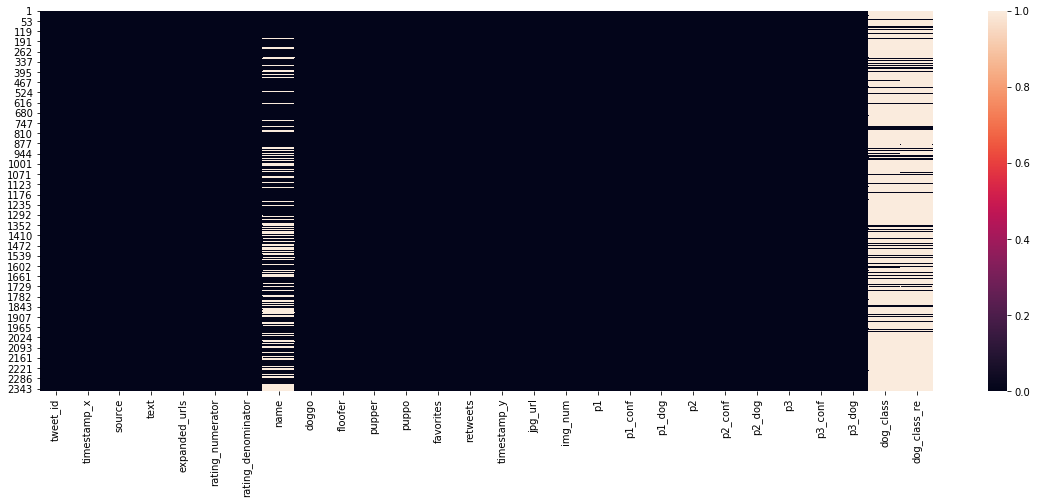

In [106]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_archive_clean.isnull(), vmin = 0, vmax = 1)

In [107]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 28 columns):
tweet_id              1640 non-null object
timestamp_x           1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
doggo                 1640 non-null object
floofer               1640 non-null object
pupper                1640 non-null object
puppo                 1640 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
timestamp_y           1640 non-null datetime64[ns]
jpg_url               1640 non-null object
img_num               1640 non-null int64
p1                    1640 non-null object
p1_conf               1640 non-null float64
p1_dog                1640 non-null object
p2               

#### 8) Reduce the *prediction* columns into two - *breed* and *conf*

For this next step we want to reduce the prediction columns into two - *breed* and *confidence*. The columns are already sorted by confidence. We will take the most likely prediction for each row. (Which is supposed to be a dog)

In [108]:
df_master_archive_clean.query("p2_conf > p1_conf")

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,timestamp_y,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_class,dog_class_re


In [109]:
df_master_archive_clean.query("p3_conf > p1_conf")

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,timestamp_y,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_class,dog_class_re


In [110]:
df_master_archive_clean.query("p3_conf > p2_conf")

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,timestamp_y,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_class,dog_class_re


The appears to be correct.

In [111]:
#extract the most likely prediction (dog)
def get_attr(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]
    
df_master_archive_clean["breed"] = df_master_archive_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
df_master_archive_clean["conf"] = df_master_archive_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [112]:
df_master_archive_clean.iloc[:, 12:]

,favorites,retweets,timestamp_y,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_class,dog_class_re,breed,conf
1,33819,6514,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,NaN,Chihuahua,0.323581
2,25461,4328,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,NaN,Chihuahua,0.716012
3,42908,8964,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,NaN,Labrador_retriever,0.168086
4,41048,9774,2017-07-29 16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,NaN,basset,0.555712
5,20562,3261,2017-07-29 00:08:17,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN,NaN,Chesapeake_Bay_retriever,0.425595
6,12041,2158,2017-07-28 16:27:12,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN,NaN,Appenzeller,0.341703
7,56848,16716,2017-07-28 00:22:40,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN,NaN,Pomeranian,0.566142
8,28226,4429,2017-07-27 16:25:51,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN,NaN,Irish_terrier,0.487574
9,32467,7711,2017-07-26 15:59:51,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,doggo,Pembroke,0.511319
10,31166,7624,2017-07-26 00:31:25,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,NaN,NaN,Samoyed,0.957979


In [113]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 30 columns):
tweet_id              1640 non-null object
timestamp_x           1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
doggo                 1640 non-null object
floofer               1640 non-null object
pupper                1640 non-null object
puppo                 1640 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
timestamp_y           1640 non-null datetime64[ns]
jpg_url               1640 non-null object
img_num               1640 non-null int64
p1                    1640 non-null object
p1_conf               1640 non-null float64
p1_dog                1640 non-null object
p2               

In [114]:
# https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
#drop the reduced columns
df_master_archive_clean.drop(df_master_archive_clean.columns[8:12], inplace = True, axis = 1)

In [115]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1640 non-null object
timestamp_x           1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
timestamp_y           1640 non-null datetime64[ns]
jpg_url               1640 non-null object
img_num               1640 non-null int64
p1                    1640 non-null object
p1_conf               1640 non-null float64
p1_dog                1640 non-null object
p2                    1640 non-null object
p2_conf               1640 non-null float64
p2_dog                1640 non-null object
p3                    1640 non-null object
p3_conf         

In [116]:
df_master_archive_clean.drop(df_master_archive_clean.columns[13:21], inplace = True, axis = 1)

In [117]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 18 columns):
tweet_id              1640 non-null object
timestamp_x           1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
timestamp_y           1640 non-null datetime64[ns]
jpg_url               1640 non-null object
img_num               1640 non-null int64
p3_dog                1640 non-null object
dog_class             250 non-null object
dog_class_re          242 non-null object
breed                 1640 non-null object
conf                  1640 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(10)
memory usage: 323.4+ KB


In [118]:
df_master_archive_clean.drop('p3_dog', inplace = True, axis = 1)

In [119]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 17 columns):
tweet_id              1640 non-null object
timestamp_x           1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
timestamp_y           1640 non-null datetime64[ns]
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_class             250 non-null object
dog_class_re          242 non-null object
breed                 1640 non-null object
conf                  1640 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(9)
memory usage: 310.6+ KB


In [120]:
df_master_archive_clean.drop('dog_class_re', inplace = True, axis = 1)

In [121]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 16 columns):
tweet_id              1640 non-null object
timestamp_x           1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
timestamp_y           1640 non-null datetime64[ns]
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_class             250 non-null object
breed                 1640 non-null object
conf                  1640 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(8)
memory usage: 297.8+ KB


In [122]:
df_master_archive_clean.head()

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,timestamp_y,jpg_url,img_num,dog_class,breed,conf
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,33819,6514,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,25461,4328,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,42908,8964,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,41048,9774,2017-07-29 16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,20562,3261,2017-07-29 00:08:17,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,NaN,Chesapeake_Bay_retriever,0.425595


#### 9) Clean the new breed column by replacing the `_` with a whitespace and make them all lowercase

Now that we have our reduced column, we need to clean it for consistency.

In [123]:
#replace "_" with " "
df_master_archive_clean.breed = df_master_archive_clean.breed.str.replace("_", " ")

In [124]:
df_master_archive_clean.breed

1       Chihuahua                  
2       Chihuahua                  
3       Labrador retriever         
4       basset                     
5       Chesapeake Bay retriever   
6       Appenzeller                
7       Pomeranian                 
8       Irish terrier              
9       Pembroke                   
10      Samoyed                    
11      French bulldog             
12      Pembroke                   
13      French bulldog             
14      golden retriever           
15      whippet                    
16      golden retriever           
17      golden retriever           
18      Siberian husky             
20      French bulldog             
21      basset                     
23      Pembroke                   
24      Mexican hairless           
25      Samoyed                    
26      Chihuahua                  
27      kuvasz                     
29      French bulldog             
31      pug                        
33      Blenheim spaniel    

In [125]:
df_master_archive_clean.breed.value_counts()

golden retriever                  154
Labrador retriever                105
Pembroke                          93 
Chihuahua                         87 
pug                               62 
toy poodle                        50 
chow                              48 
Samoyed                           42 
Pomeranian                        39 
malamute                          33 
French bulldog                    31 
cocker spaniel                    29 
Chesapeake Bay retriever          29 
miniature pinscher                24 
Eskimo dog                        22 
Cardigan                          21 
German shepherd                   21 
Shih-Tzu                          20 
beagle                            20 
Staffordshire bullterrier         20 
Siberian husky                    19 
Rottweiler                        18 
Maltese dog                       18 
Shetland sheepdog                 18 
kuvasz                            17 
basset                            17 
Italian grey

In [126]:
#lower the strings
df_master_archive_clean.breed = df_master_archive_clean.breed.str.lower()

In [127]:
df_master_archive_clean.breed

1       chihuahua                  
2       chihuahua                  
3       labrador retriever         
4       basset                     
5       chesapeake bay retriever   
6       appenzeller                
7       pomeranian                 
8       irish terrier              
9       pembroke                   
10      samoyed                    
11      french bulldog             
12      pembroke                   
13      french bulldog             
14      golden retriever           
15      whippet                    
16      golden retriever           
17      golden retriever           
18      siberian husky             
20      french bulldog             
21      basset                     
23      pembroke                   
24      mexican hairless           
25      samoyed                    
26      chihuahua                  
27      kuvasz                     
29      french bulldog             
31      pug                        
33      blenheim spaniel    

In [128]:
#reset index to match with the real amount of rows
df_master_archive_clean.reset_index(drop = True, inplace = True)

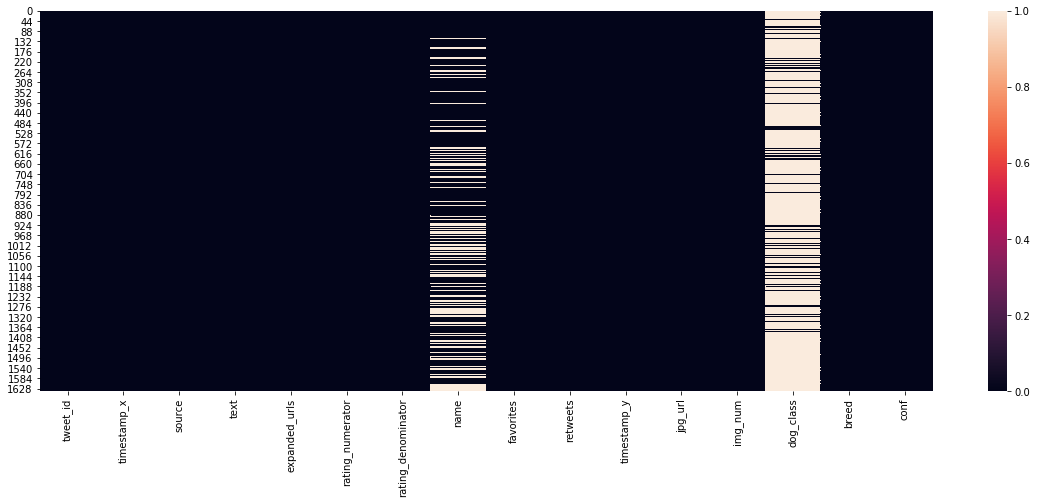

In [129]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_archive_clean.isnull(), vmin = 0, vmax = 1)

In [130]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 16 columns):
tweet_id              1640 non-null object
timestamp_x           1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
timestamp_y           1640 non-null datetime64[ns]
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_class             250 non-null object
breed                 1640 non-null object
conf                  1640 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(8)
memory usage: 205.1+ KB


In [131]:
df_master_archive_clean[["breed", "conf"]].head()

,breed,conf
0,chihuahua,0.323581
1,chihuahua,0.716012
2,labrador retriever,0.168086
3,basset,0.555712
4,chesapeake bay retriever,0.425595


#### 10) Drop `timestamp_y` and rename `timestamp_x`

In [132]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 16 columns):
tweet_id              1640 non-null object
timestamp_x           1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
timestamp_y           1640 non-null datetime64[ns]
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_class             250 non-null object
breed                 1640 non-null object
conf                  1640 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(8)
memory usage: 205.1+ KB


In [133]:
df_master_archive_clean.drop('timestamp_y', axis=1, inplace=True)

In [134]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 15 columns):
tweet_id              1640 non-null object
timestamp_x           1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_class             250 non-null object
breed                 1640 non-null object
conf                  1640 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 192.3+ KB


`timestamp_y` has been dealt with. Now to rename column `timestamp_x`.

In [135]:
# https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
df_master_archive_clean.rename(columns={'timestamp_x': 'timestamp'}, inplace=True)

In [136]:
df_master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 15 columns):
tweet_id              1640 non-null object
timestamp             1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_class             250 non-null object
breed                 1640 non-null object
conf                  1640 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 192.3+ KB


In [137]:
#save the data to a *.csv file
df_master_archive_clean.to_csv('twitter_master_archive_file.csv', index = False)

<a id='analysis'></a>
### Part IV - Data Analysis

Questions:

1. Which breed of dog gets retweeted and favorited the most overall?
2. How did the account develop (speaking about number of tweets, retweets, favorites and image number of the tweets)?
3. Is there a pattern visible in the timing of the tweets?

#### 1. Which breed of dog gets retweeted and favorited the most overall?

To answer this question we need to take a look at the frequency of the breed occurence and afterwards we will create a groupby object to sum up the *favorites* and *retweets* count of each breed in this dataset.

In [138]:
#read in the master csv
df_master = pd.read_csv("twitter_master_archive_file.csv")

In [139]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,img_num,dog_class,breed,conf
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,labrador retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,NaN,chesapeake bay retriever,0.425595


In [140]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites',
       'retweets', 'jpg_url', 'img_num', 'dog_class', 'breed', 'conf'],
      dtype='object')

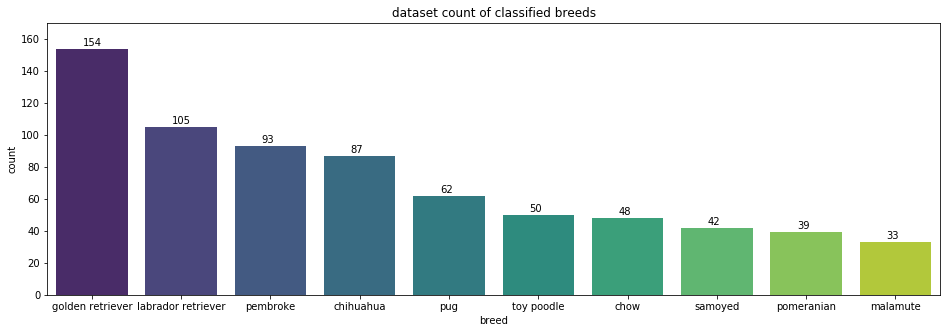

In [141]:
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "breed", data = df_master, order=df_master.breed.value_counts().iloc[:10].index, palette = "viridis")
ax.set_title("dataset count of classified breeds");

ax.set_ylim(0, 170)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

The dogs displayed in the images are mostly golden retrievers with a count of 154 or labrador retrievers with a count of 105.

In [142]:
df_breed_group = df_master[["retweets", "favorites", "breed"]].groupby("breed", as_index = False).sum()

In [143]:
df_breed_group.sort_values("retweets", ascending = False).head(10)

,breed,retweets,favorites
45,golden retriever,573953,1915088
62,labrador retriever,405163,1264586
80,pembroke,291262,1036756
27,chihuahua,234198,714274
88,samoyed,203446,583906
41,french bulldog,156230,570921
30,cocker spaniel,142340,394894
28,chow,131025,446933
82,pug,118682,383817
103,toy poodle,115330,337270


In [144]:
df_breed_group.sort_values("favorites", ascending = False).head(10)

,breed,retweets,favorites
45,golden retriever,573953,1915088
62,labrador retriever,405163,1264586
80,pembroke,291262,1036756
27,chihuahua,234198,714274
88,samoyed,203446,583906
41,french bulldog,156230,570921
28,chow,131025,446933
30,cocker spaniel,142340,394894
82,pug,118682,383817
103,toy poodle,115330,337270


The golden retriever and the labrador retriever are the most favorited and retweeted on the list.

In [145]:
df_breed_group["sum"] = df_breed_group["retweets"] + df_breed_group["favorites"]

In [146]:
df_breed_group.sort_values("sum", ascending = False).head(10)

,breed,retweets,favorites,sum
45,golden retriever,573953,1915088,2489041
62,labrador retriever,405163,1264586,1669749
80,pembroke,291262,1036756,1328018
27,chihuahua,234198,714274,948472
88,samoyed,203446,583906,787352
41,french bulldog,156230,570921,727151
28,chow,131025,446933,577958
30,cocker spaniel,142340,394894,537234
82,pug,118682,383817,502499
103,toy poodle,115330,337270,452600


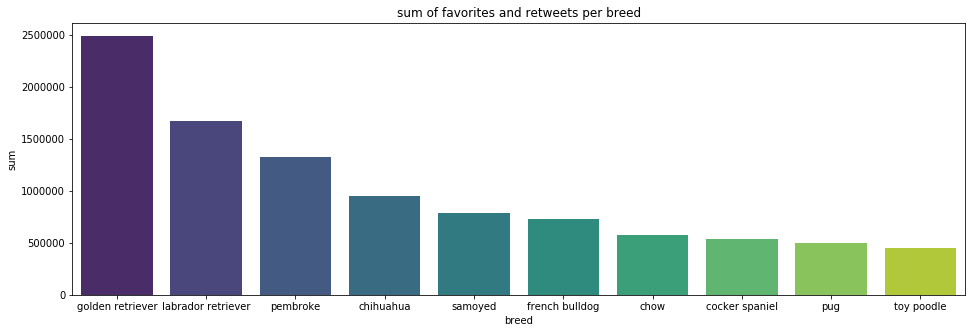

In [147]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "breed", y = "sum", data = df_breed_group.sort_values("sum", ascending=False).iloc[:10], palette = "viridis")
ax.set_title("sum of favorites and retweets per breed");

Now let's take a look at the single tweet that was the most retweeted and favorited.

In [148]:
df_master[["retweets", "favorites", "breed"]].sort_values("retweets", ascending = False).head()

,retweets,favorites,breed
684,79515,131075,labrador retriever
360,56625,107015,chihuahua
711,52360,75163,eskimo dog
275,48265,132810,lakeland terrier
53,45849,107956,english springer


In [149]:
df_master[["retweets", "favorites", "breed"]].sort_values("favorites", ascending = False).head(5)

,retweets,favorites,breed
275,48265,132810,lakeland terrier
684,79515,131075,labrador retriever
53,45849,107956,english springer
360,56625,107015,chihuahua
100,32883,106827,french bulldog


From our provided data, we can see that the most retweeted tweet is the labrador retriever, while the most liked tweet is the lakeland terrier. With golden retrievers not even being in the list. Let's see if there are big differences in the average rating.

In [150]:
df_breed_group_mean = df_master[["rating_numerator", "breed"]].groupby("breed", as_index = False).mean()

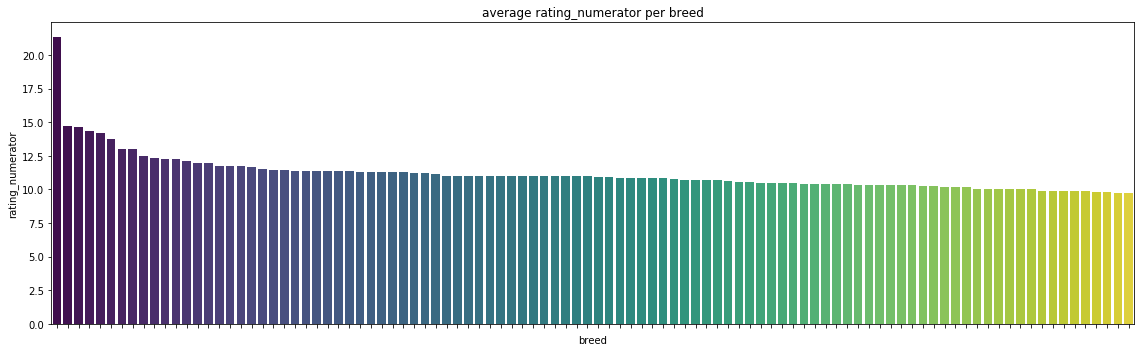

In [151]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "breed", y = "rating_numerator", 
                 data = df_breed_group_mean.sort_values("rating_numerator", ascending = False).iloc[:100], palette = "viridis")
ax.set_title("average rating_numerator per breed");
#https://code.i-harness.com/de/q/2135a8
ax.xaxis.set_ticklabels([])
plt.tight_layout()

While the most breeds are on average on nearly the same level of rating, there is a visible outlier.

In [152]:
df_breed_group_mean.sort_values("rating_numerator", ascending = False).head(10)

,breed,rating_numerator
96,soft-coated wheaten terrier,21.357143
109,west highland white terrier,14.687500
48,great pyrenees,14.666667
16,borzoi,14.333333
28,chow,14.166667
62,labrador retriever,13.714286
4,australian terrier,13.000000
18,bouvier des flandres,13.000000
87,saluki,12.500000
21,briard,12.333333


In [153]:
df_master[["breed", "rating_numerator"]].sort_values("rating_numerator", ascending = False).head()

,breed,rating_numerator
588,labrador retriever,165.0
1229,chow,144.0
1122,soft-coated wheaten terrier,121.0
829,golden retriever,99.0
1276,labrador retriever,88.0


In [154]:
len(df_master.query("breed == 'labrador retriever'"))

105

In [155]:
len(df_master.query("breed == 'soft-coated wheaten terrier'"))

14

In [156]:
df_master.query("breed != 'soft-coated wheaten terrier'").rating_numerator.mean()

11.266162361623616

The soft-coated wheaten terrier got a very high mean rating. While the labrador retriever got overall the biggest rating with 165, in addition to there being a lot more tweets with the labrador retriever than for the soft-coated wheaten terrier, the one big rating of the soft-coated wheaten terrier has a higher weight then the one of the labrador retriever (14 tweets of soft-coated wheaten terrier and 105 of labrador retriever).

Not taking the outlier into account, this leads us to an average rating of 11. Based on the number of posts, retweets, favorites and mean rating, we will give the title of "Most overall liked dog of this Twitter account and its community" to the labrador retriever.

#### 2. How did the account develop (speaking about number of tweets, retweets, favorites and image number of the tweets)?

To answer this question we first have to extract time information out of the timestamp.

In [157]:
df_time = df_master.copy()

In [158]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 15 columns):
tweet_id              1640 non-null int64
timestamp             1640 non-null object
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_class             250 non-null object
breed                 1640 non-null object
conf                  1640 non-null float64
dtypes: float64(3), int64(4), object(8)
memory usage: 192.3+ KB


The `timestamp` is a string again, so I will have to transform it again.

In [159]:
df_time.timestamp = pd.to_datetime(df_time.timestamp)

Day of the week first:

In [160]:
df_time["dow"] = df_time["timestamp"].apply(lambda x: x.dayofweek)

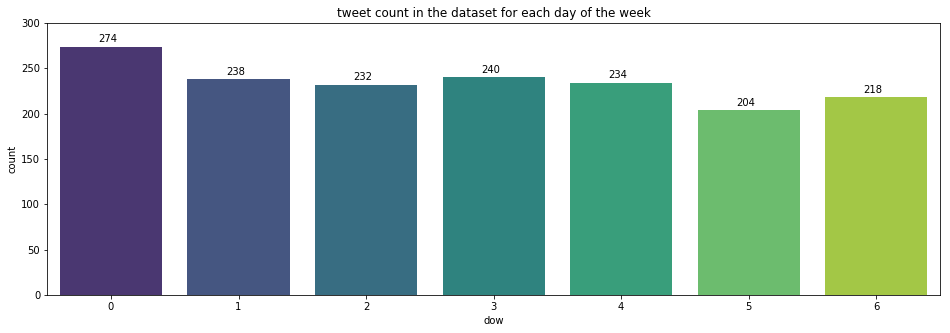

In [161]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "dow", data = df_time, palette = "viridis")
ax.set_title("tweet count in the dataset for each day of the week");

ax.set_ylim(0, 300)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

We can see that most of the tweets are posted on Monday (labeled as `0`). For Tuesday to Friday (`1` to `4`) it is nearly the same number of posts. On the weekend the Twitter profile tweets a little bit less.

In [162]:
df_time.timestamp.min()

Timestamp('2015-11-15 22:32:08')

In [163]:
df_time.timestamp.max()

Timestamp('2017-08-01 00:17:27')

This dataset contains data from November of 2015 to August of 2017. Let's extract the month, year and hour information from the timestamp.

In [164]:
#get the month out of the timestamp
df_time["month"] = df_time["timestamp"].apply(lambda x: x.month)
#get the year out of the timestamp
df_time["year"] = df_time["timestamp"].apply(lambda x: x.year)
#get the hour out of the timestamp
df_time["hour"] = df_time["timestamp"].apply(lambda x: x.hour)

In [165]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 19 columns):
tweet_id              1640 non-null int64
timestamp             1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_class             250 non-null object
breed                 1640 non-null object
conf                  1640 non-null float64
dow                   1640 non-null int64
month                 1640 non-null int64
year                  1640 non-null int64
hour                  1640 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8), object(7)
memory usage: 2

For the first graph, let's take a look at the full year of 2016.

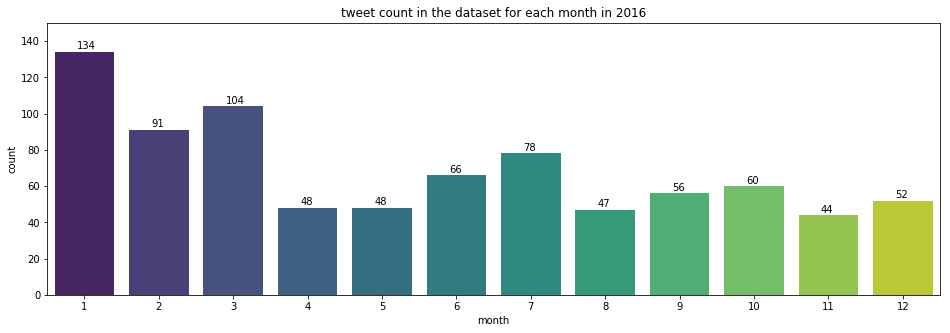

In [166]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "month", data = df_time.query("year == 2016"), palette = "viridis")
ax.set_title("tweet count in the dataset for each month in 2016");

ax.set_ylim(0,150)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.5))

Over the course of 2016, the number of posts per month decreased. It went from 134 tweets in January, to 52 in December. Does this mean, that the performance of this account is also decreasing?

In [167]:
#create a timestamp containing year and month
#https://erikrood.com/Python_References/extract_month_year_pandas_final.html
df_time['year_&_month'] = pd.to_datetime(df_master["timestamp"]).dt.to_period('M')

In [168]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 20 columns):
tweet_id              1640 non-null int64
timestamp             1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
favorites             1640 non-null int64
retweets              1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_class             250 non-null object
breed                 1640 non-null object
conf                  1640 non-null float64
dow                   1640 non-null int64
month                 1640 non-null int64
year                  1640 non-null int64
hour                  1640 non-null int64
year_&_month          1640 non-null object
dtypes: datetime64[ns](1), floa

KeyError: 'month_&_year'

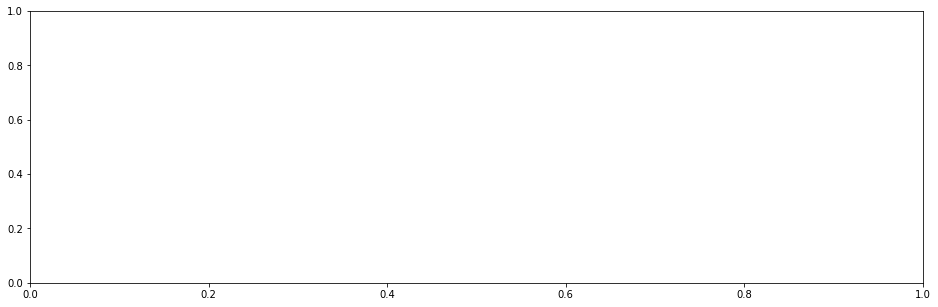

In [169]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "year_&_month", data = df_time.sort_values("month_&_year"), palette = "viridis", )
ax.set_title("dataset tweet count for each year - month combination");

ax.set_ylim(0, 300)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3))

plt.tight_layout()

If we look at it over the whole time-period, the account acitivity becomes clearer to see. In April 2016, the number of tweets dropped and since then it has stayed at a relatively stable level. To see if the performance of the account decreased we will take a look on the favorites and retweets that the posts get.

In [ ]:
df_time_groupby = df_time.groupby("year_&_month", as_index = False).sum()

In [ ]:
df_time_groupby.head()

In [ ]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "year_&_month", y = "favorites", data = df_time_groupby, palette = "viridis")
ax.set_title("sum of favorites per year-month combination");
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize = (17,5))
ax = sns.barplot(x = "year_&_month", y = "retweets", data = df_time_groupby, palette = "viridis")
ax.set_title("sum of retweets per year-month combination");

While the number of tweets per month is decreasing, the favorites and retweets per month are increasing.

In [ ]:
#create a groupby object for the mean
df_time_groupby_mean = df_time.groupby("year_&_month", as_index = False).mean()

In [ ]:
fig, ax = plt.subplots(figsize = (17,5))
ax = sns.barplot(x = "year_&_month", y = "favorites", data = df_time_groupby_mean, palette = "viridis")
ax.set_title("mean of favorites per year-month combination");
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "year_&_month", y = "retweets", data = df_time_groupby_mean, palette = "viridis")
ax.set_title("mean of retweets per year-month combination");
plt.tight_layout()

Looking at the average number of favorites and retweets, the clear uptrend gets even clearer! Now let's see if the number of posted images per month or the average upper text range changed over time as well.

In [ ]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "year_&_month", y = "img_num", data = df_time_groupby_mean, palette = "viridis")
ax.set_title("mean image number per year-month combination");
plt.tight_layout()

For images, it seems pretty stable. While there are months where there are more posted images, as well as months where there are less, overall there is no clean up - or downtrend visible.

#### 3. Is there a pattern visible in the timing of the tweets?

In [ ]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "hour", data = df_time.query("year == 2015"), palette = "viridis")
ax.set_title("tweet count in the dataset for each hour in 2015");

In [ ]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "hour", data = df_time.query("year == 2016"), palette = "viridis")
ax.set_title("tweet count in the dataset for each hour in 2016");

As we can see from the graphs of 2015 and 2016, the most posts are made during the night from 0 o'clock (12 AM) to 4 o'clock (4 AM). Between 3 o'clock and 15 'o clock (3 PM), there are very small amounts of tweets, in fact there is no single tweet for the hours 7 - 12 o' clock (7 AM to 12 PM) in 2015, in addition to no single tweet between 7 - 13 o'clock (7 AM to 1 PM) in 2016. While there is quite a number of tweets between 16 o'clock (4 PM) and 23 o'clock (11 PM), there are not as much as between 0 (included) and 4 o'clock.

<a id='summary/conclusion'></a>
### Summary and Conclusions


In this project we went through an entire data wrangling process. The data gathering included programmatical and manual downloading. And while an attempt was made to gather data via API, technical difficulties made this option unusable. Additionally, the cleaning part covered a lot of techniques, like regular expressions and overall handling of dataframes.

In the analysis, we asked and answered the following questions:


1. **Which breed of dog gets retweeted and favorited the most overall?**
<br>
The winner for our analysis was the labrador retriever.
2. **How did the account develop (speaking about number of tweets, retweets, favorites, and image number of the tweets)?**
<br>
We found that while the number of tweets per month decreased, the retweets and favorites were trending upwards. For the image numbers there is no clear trend visible.
3. **Is there a pattern visible in the timing of the tweets?**
<br>
Here we found, that between 6 and 13 o'clock there are nearly no tweets at all. The most tweets are during the time from 0 - 3 and then from 15 - 23, but from 15 - 23 are less tweets than between 0 - 3.